In [19]:
import pandas as pd
import matplotlib.pyplot as plt

A. Print the names of the 8 countries with highest corona patients in the fourth month of 2020.

In [3]:
cdata=pd.read_csv("COVID-19-time-series-clean-complete.csv")
cdata

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
108654,108654,2021-08-06,Vietnam,193381,3016,0.0,190365.0,4315,296,0
108655,108655,2021-08-06,West Bank and Gaza,317703,3611,0.0,314092.0,169,2,0
108656,108656,2021-08-06,Yemen,7131,1384,0.0,5747.0,27,1,0
108657,108657,2021-08-06,Zambia,199135,3459,0.0,195676.0,680,12,0


In [4]:
cdata['Date'] = pd.to_datetime(cdata['Date'])
cdata['DateYearMonth'] = cdata['Date'].map(lambda date: 100 * date.year + date.month)
cdata

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,DateYearMonth
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0,202001
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0,202001
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0,202001
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0,202001
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0,202001
...,...,...,...,...,...,...,...,...,...,...,...
108654,108654,2021-08-06,Vietnam,193381,3016,0.0,190365.0,4315,296,0,202108
108655,108655,2021-08-06,West Bank and Gaza,317703,3611,0.0,314092.0,169,2,0,202108
108656,108656,2021-08-06,Yemen,7131,1384,0.0,5747.0,27,1,0,202108
108657,108657,2021-08-06,Zambia,199135,3459,0.0,195676.0,680,12,0,202108


In [16]:
mask=cdata['DateYearMonth']==202004
mask

0         False
1         False
2         False
3         False
4         False
          ...  
108654    False
108655    False
108656    False
108657    False
108658    False
Name: DateYearMonth, Length: 108659, dtype: bool

In [18]:
aprilcdata=cdata[mask].reset_index()
final=aprilcdata.groupby(['Country/Region'])['Confirmed'].sum().reset_index().sort_values("Confirmed",ascending = False).reset_index()
final.head(9)

,index,Country/Region,Confirmed
0,179,US,19960815
1,162,Spain,5236777
2,84,Italy,4928524
3,65,Germany,3942925
4,61,France,3456319
5,183,United Kingdom,3328344
6,36,China,2500143
7,80,Iran,2255837
8,178,Turkey,2098207


B. Plot the death rate in Iran on different days.

In [20]:
mask=cdata['Country/Region']=='Iran'
irandeathrate=cdata.loc[mask]
irandeathrate

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,DateYearMonth
80,80,2020-01-22,Iran,0,0,0.0,0.0,0,0,0,202001
273,273,2020-01-23,Iran,0,0,0.0,0.0,0,0,0,202001
466,466,2020-01-24,Iran,0,0,0.0,0.0,0,0,0,202001
659,659,2020-01-25,Iran,0,0,0.0,0.0,0,0,0,202001
852,852,2020-01-26,Iran,0,0,0.0,0.0,0,0,0,202001
...,...,...,...,...,...,...,...,...,...,...,...
107774,107774,2021-08-02,Iran,3940708,91407,3404533.0,444768.0,37189,411,19338,202108
107967,107967,2021-08-03,Iran,3979727,91785,3424650.0,463292.0,39019,378,20117,202108
108160,108160,2021-08-04,Iran,4019084,92194,3444798.0,482092.0,39357,409,20148,202108
108353,108353,2021-08-05,Iran,4057758,92628,0.0,3965130.0,38674,434,-3444798,202108


In [22]:
ndiran = irandeathrate.groupby(['DateYearMonth'])['New deaths'].sum().reset_index()
nciran = irandeathrate.groupby(['DateYearMonth'])['New cases'].sum().reset_index()
print(ndiran)
print(nciran)

    DateYearMonth  New deaths
0          202001           0
1          202002          43
2          202003        2855
3          202004        3130
4          202005        1769
5          202006        3020
6          202007        5949
7          202008        4805
8          202009        4598
9          202010        8695
10         202011       13382
11         202012        6977
12         202101        2736
13         202102        2114
14         202103        2592
15         202104        9093
16         202105        8398
17         202106        4108
18         202107        6366
19         202108        2456
    DateYearMonth  New cases
0          202001          0
1          202002        593
2          202003      44012
3          202004      50035
4          202005      56826
5          202006      76196
6          202007      76542
7          202008      71008
8          202009      82007
9          202010     155553
10         202011     349298
11         202012     

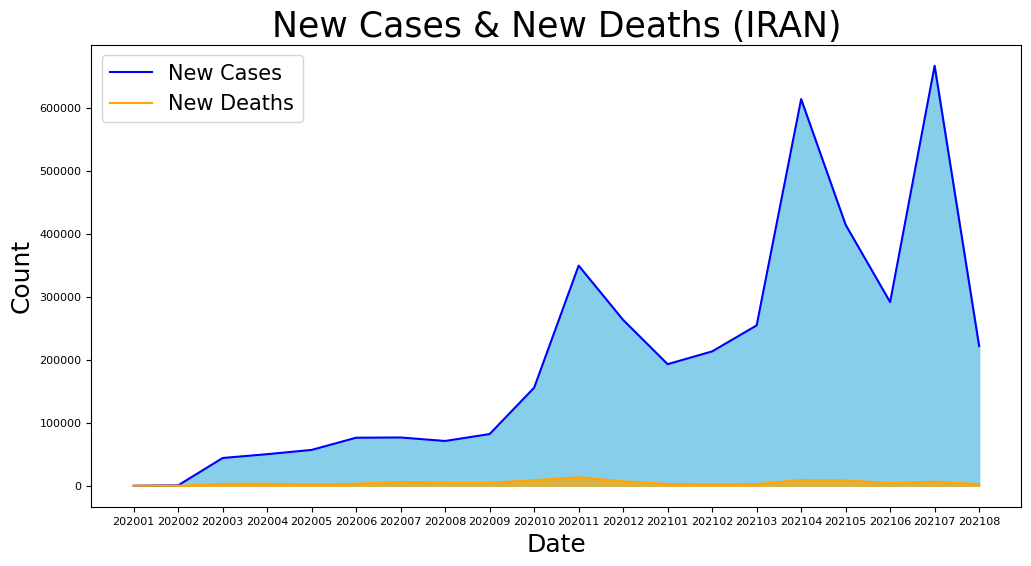

In [24]:
# the death rate in Iran on different days
plt.figure(figsize = (12, 6))
plt.plot(nciran['DateYearMonth'].to_numpy(dtype=str), nciran['New cases'], label='New Cases', color='blue')
plt.fill_between(nciran['DateYearMonth'].to_numpy(dtype=str), nciran['New cases'], color='skyblue', alpha=1)
plt.plot(ndiran['DateYearMonth'].to_numpy(dtype=str),ndiran['New deaths'], label='New Deaths', color='orange')
plt.fill_between(ndiran['DateYearMonth'].to_numpy(dtype=str), ndiran['New deaths'], color='orange', alpha=0.7)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.grid(False)  
plt.legend(fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=8) 
plt.title('New Cases & New Deaths (IRAN)', fontsize=25)
plt.show()
# plt.savefig('New Cases & New Deaths (IRAN).png')
